In [9]:
# Brookes Heil Blackburn
# MAT 5990 Spring 2026
# Homework #1 - Question 5.a

In [2]:
%matplotlib widget
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 14})

In [3]:
df = pd.read_csv('PAYNSA.csv')
# df.set_index('observation_date', inplace=True)
df.reset_index
df.head()

,observation_date,PAYNSA
0,1939-01-01,29296
1,1939-02-01,29394
2,1939-03-01,29804
3,1939-04-01,29786
4,1939-05-01,30145


0        29296
1        29394
2        29804
3        29786
4        30145
         ...  
1039    159404
1040    159732
1041    160397
1042    160640
1043    160448
Name: PAYNSA, Length: 1044, dtype: int64
      C_0     C_1        C_2
0     1.0     0.0        0.0
1     1.0     1.0        1.0
2     1.0     2.0        4.0
3     1.0     3.0        9.0
4     1.0     4.0       16.0
...   ...     ...        ...
1039  1.0  1039.0  1079521.0
1040  1.0  1040.0  1081600.0
1041  1.0  1041.0  1083681.0
1042  1.0  1042.0  1085764.0
1043  1.0  1043.0  1087849.0

[1044 rows x 3 columns]
[2.85217687e+04 1.18606497e+02 8.36794743e-03]
               gval
0      28521.768736
1      28640.383601
2      28759.015201
3      28877.663538
4      28996.328610
...             ...
1039  160787.293970
1040  160923.297429
1041  161059.317625
1042  161195.354556
1043  161331.408223

[1044 rows x 1 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_16596\2827251961.py:49: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df.index, gvals['gval'], cmap='bwr',marker='v', s=5,


ymean
93410.86590038314
ytotal
1562023100303.226
Y
0        29296
1        29394
2        29804
3        29786
4        30145
         ...  
1039    159404
1040    159732
1041    160397
1042    160640
1043    160448
Name: PAYNSA, Length: 1044, dtype: int64
y_res
24057253652.119377
R-squared value (manual): 0.9845986569293058


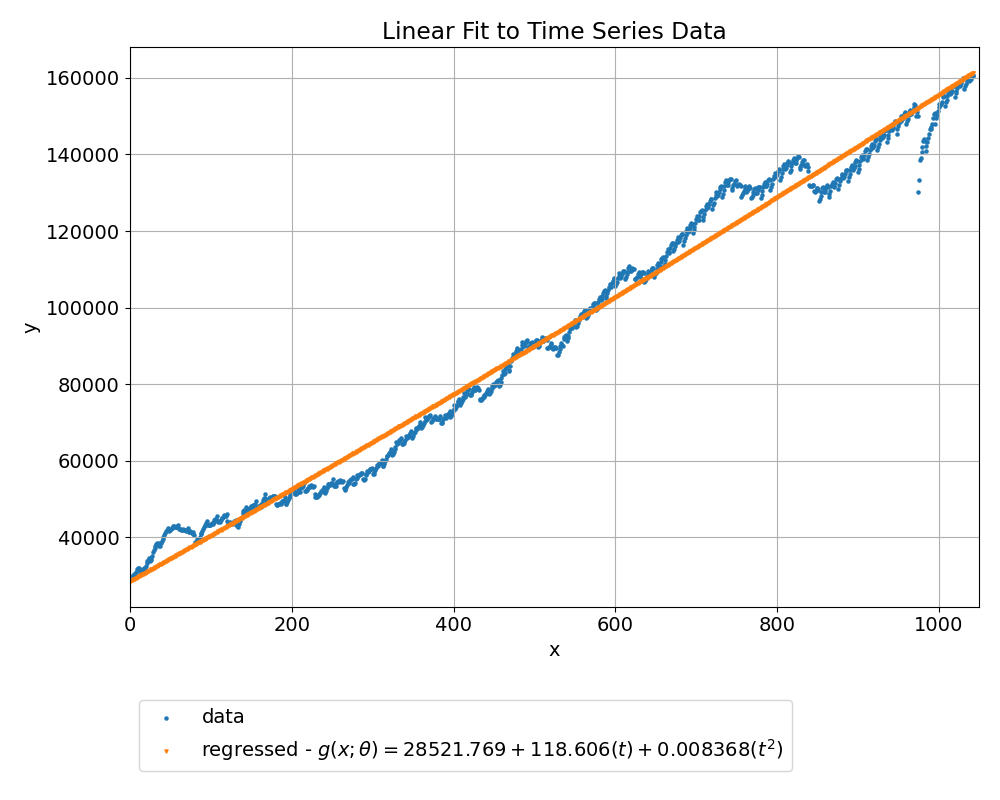

In [4]:
# Adapted from Professor Aminians Code

# note to self: In linear regression E(t) = c_0 + (c_1)t + (c_2)t^2 results in Phi:
# Phi col n=1 of all X vector for phi_0 (note just x in above)
# Phi col n=2 is all of Y vector phi_1 (note just y in above)

gfuncs = lambda t : np.array([
        np.ones(np.shape(t)), 
        t,
        t**2
        ]).T

# gfuncs = lambda t : pd.DataFrame(

df['observation_date'] = pd.to_datetime(df['observation_date'])
df.head()

# The Data
Y = df['PAYNSA']
print(Y)

# Plug T into each \phi function and create Phi df
gfunc_calc = gfuncs(df.index)
Phi_g = pd.DataFrame(gfunc_calc, columns=['C_0', 'C_1', 'C_2'])
print(Phi_g)

# Let Python solve for theta in the \Phi^T\Phi\theta = \Phi^T * y "Normals Equations"
# Theta represents the c_0 and c_1 which are the coefficients on the linear regression

theta_g = np.linalg.lstsq(Phi_g, Y)[0]
print(theta_g)

# gvals represent the function output of the g(X, \theta)...the intercept(c_0) and slope(c_1) of linear regression
# with least residuals

gvals = Phi_g @ theta_g # matrix-vector product
gvals = pd.DataFrame(gvals)
gvals.columns = ['gval']
# gvals['is_positive'] = (df['z'] > 0).astype(int)
# gvals.info()
print(gvals)

fig,ax = plt.subplots()

# original data
ax.scatter(df.index,Y, marker='o', s=5, label='data')

# regression
ax.scatter(df.index, gvals['gval'], cmap='bwr',marker='v', s=5, 
           label=rf'regressed - $g(x; \theta) = {theta_g[0]: .3f} + {theta_g[1]: .3f}(t) + {theta_g[2]: .6f}(t^2)$', 
           zorder=2)

# polish
ax.legend(loc='upper left', bbox_to_anchor=(0,-0.15))
ax.set(title='Linear Fit to Time Series Data',
       xlabel='x', 
       ylabel='y',
       xlim=(-1,1050)
      )
ax.grid()
fig.set_figwidth(10)
fig.set_figheight(8)
fig.tight_layout()
plt.savefig(f'MAT5990_HW1_4.jpg')

# Calculate r^2
# (1 - ( (y.data - y.regressed)^2 / ( y.data - y.mean)^2 )

Y_mean = np.mean(df['PAYNSA'])
print("ymean")
print(Y_mean)
Y_tot = np.sum((df['PAYNSA'] - Y_mean)**2)
print("ytotal")
print(Y_tot)
Y_res = np.sum((df['PAYNSA'] - gvals['gval'])**2)
print("Y")
print(Y)
print("y_res")
print(Y_res)

r_squared_manual = 1 - (Y_res / Y_tot)
print(f"R-squared value (manual): {r_squared_manual}")
